The TL;DR of this notebook is that it uses k-means clustering to cluster an image dataset. This notebook is from an academic assignment I completed and so may contain aspects from that. This is essentially to show that I can use large datasets and classify it using k-means. I have used k-means in other applications, this notebook is an example that uses it on images and so it conveys my skills better. 

This notebook was originally run on Google Colab


In [ ]:
import random, os, sys, shutil
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import tensorflow.keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Path to folder
path_to_images = '/content/drive/MyDrive/' + "AFMVanGoghDraw/"
#image extension
file_type = ".jpg"
#Pick image size
img_height = 224
img_width = 224
#Is it rgb or black and white?
channels = 3

In [ ]:
#Get all paths
paths = []
for root, dirs, files in os.walk(path_to_images, topdown=False):
    for name in files:
        if file_type in name.lower():
            paths.append(str(os.path.join(root, name)))
#Load in images
dataset = [np.array(img_to_array(load_img(i,target_size=((img_height,img_width)))))/255.0 for i in paths]
dataset = np.array(dataset).astype("float32")
dataset.shape

(1002, 224, 224, 3)

In [ ]:
model = tensorflow.keras.applications.MobileNetV2(input_shape=(224,224,3), alpha=1.0, weights='imagenet', pooling=None)

14548992/14536120 [==============================] - 0s 0us/step


In [ ]:
pred = model.predict(dataset)
print(pred.shape)
x = pred.reshape(dataset.shape[0], -1)

(1002, 1000)


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
x = StandardScaler().fit_transform(x)

In [ ]:
#Get reduced dimensions
pca = PCA(n_components=2)
x_2d = pca.fit_transform(x)

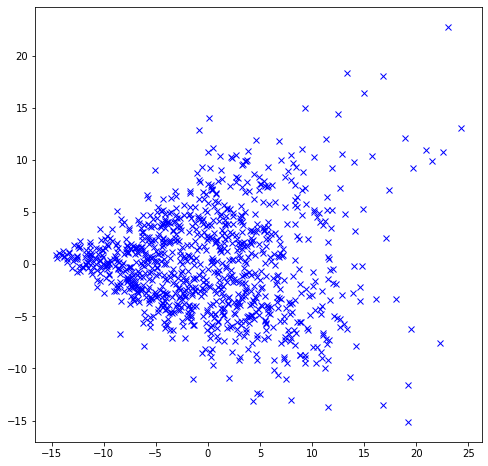

In [ ]:
#Plot
plt.figure(figsize=(8, 8))
a = plt.plot(x_2d[:,0],x_2d[:,1],"bx")

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='r', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_clusters(clusterer, X):
    labels = clusterer.predict(X)
    pca = PCA(n_components=2)
    x_2d = pca.fit_transform(X)
    plt.scatter(x_2d[:, 0], x_2d[:, 1], c=labels, alpha=0.3)
    plot_centroids(clusterer.cluster_centers_)

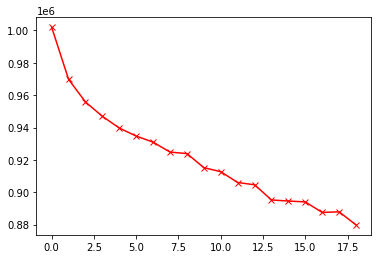

In [ ]:
scores=[]
for i in range(1,20):
    #Fit for k
    means=KMeans(n_clusters=i)
    means.fit(x)
    #Get inertia
    scores.append(means.inertia_)
plt.plot(scores,"-rx")

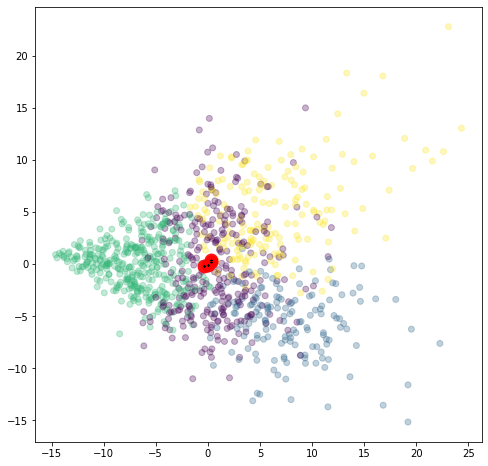

In [ ]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x)
plt.figure(figsize=(8, 8))
#Plot clusters onto PCA reduced plot
plot_clusters(kmeans, x)

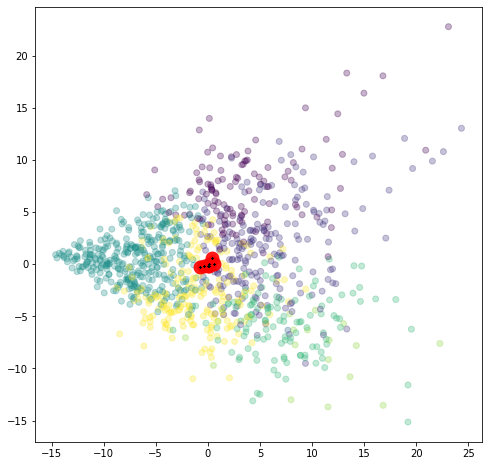

In [ ]:
k = 7
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x)
plt.figure(figsize=(8, 8))
#Plot clusters onto PCA reduced plot
plot_clusters(kmeans, x)

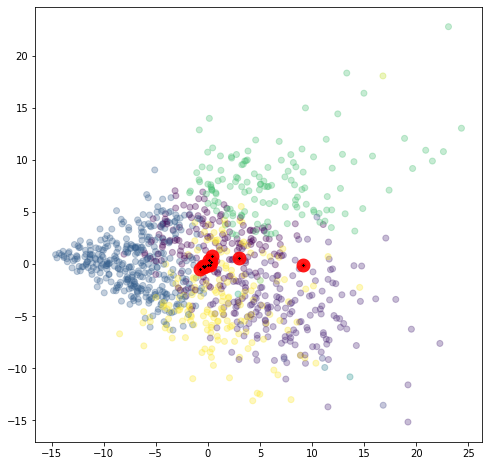

In [ ]:
k = 11
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x)
plt.figure(figsize=(8, 8))
#Plot clusters onto PCA reduced plot
plot_clusters(kmeans, x)

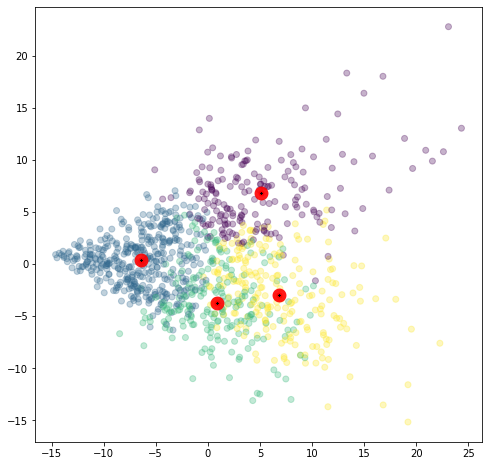

In [ ]:
#How many dimensions to reduce to (before clustering)?
num_dimensions = 4
k = 4
#Reduce dimensions
pca = PCA(n_components=num_dimensions)
x_less_dimensions = pca.fit_transform(x)

#Fit cluster
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_less_dimensions)

#Plot results
plt.figure(figsize=(8, 8))
plot_clusters(kmeans, x_less_dimensions)

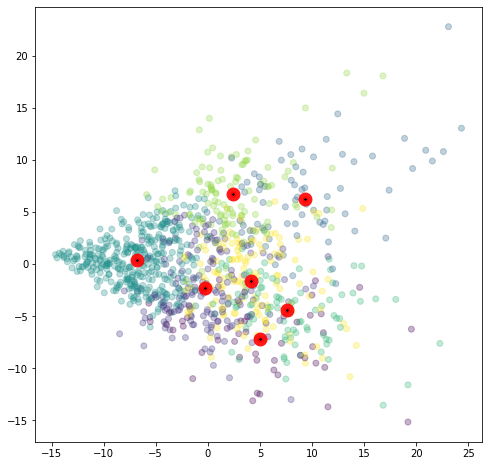

In [ ]:
#How many dimensions to reduce to (before clustering)?
num_dimensions = 7
k = 7
#Reduce dimensions
pca = PCA(n_components=num_dimensions)
x_less_dimensions = pca.fit_transform(x)

#Fit cluster
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_less_dimensions)

#Plot results
plt.figure(figsize=(8, 8))
plot_clusters(kmeans, x_less_dimensions)

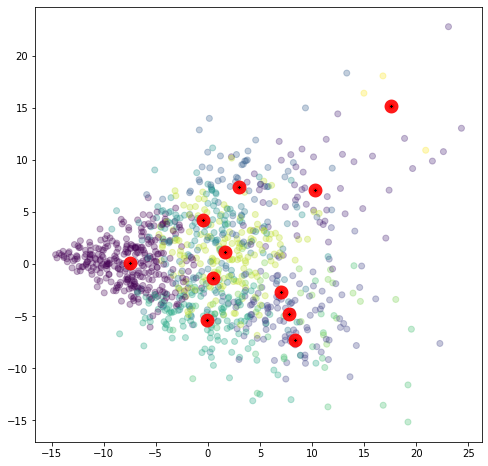

In [ ]:
#How many dimensions to reduce to (before clustering)?
num_dimensions = 11
k = 11
#Reduce dimensions
pca = PCA(n_components=num_dimensions)
x_less_dimensions = pca.fit_transform(x)

#Fit cluster
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_less_dimensions)

#Plot results
plt.figure(figsize=(8, 8))
plot_clusters(kmeans, x_less_dimensions)

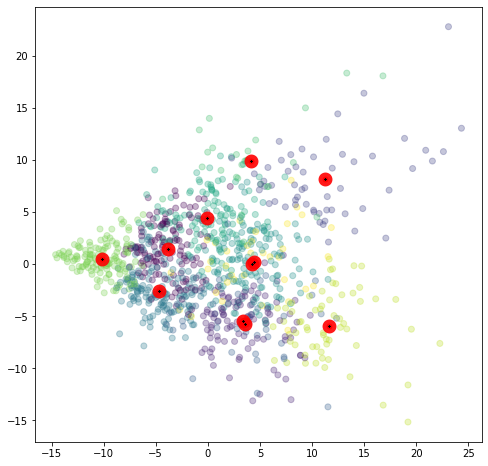

In [ ]:
#How many dimensions to reduce to (before clustering)?
num_dimensions = 4
k = 11
#Reduce dimensions
pca = PCA(n_components=num_dimensions)
x_less_dimensions = pca.fit_transform(x)

#Fit cluster
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_less_dimensions)

#Plot results
plt.figure(figsize=(8, 8))
plot_clusters(kmeans, x_less_dimensions)

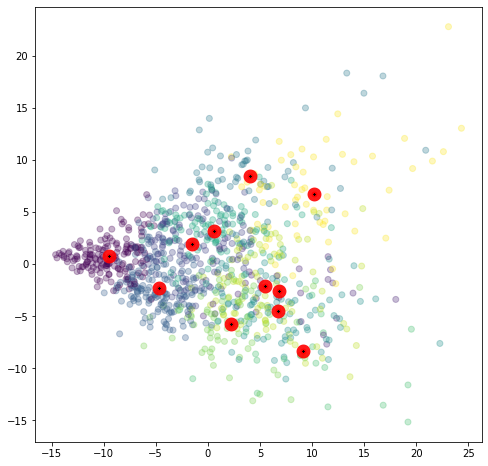

In [ ]:
#How many dimensions to reduce to (before clustering)?
num_dimensions = 7
k = 11
#Reduce dimensions
pca = PCA(n_components=num_dimensions)
x_less_dimensions = pca.fit_transform(x)

#Fit cluster
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_less_dimensions)

#Plot results
plt.figure(figsize=(8, 8))
plot_clusters(kmeans, x_less_dimensions)

In [ ]:
!fc-list

/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf: Liberation Sans Narrow:style=Italic
/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf: Liberation Sans:style=Regular
/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf: Liberation Mono:style=Bold Italic
/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf: Liberation Serif:style=Italic
/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf: Liberation Mono:style=Bold
/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf: Liberation Sans Narrow:style=Regular
/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf: Liberation Serif:style=Bold
/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf: Liberation Mono:style=Regular
/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf: Liberation Sans:style=Italic
/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf: Liberation Serif:style=Bold Italic
/usr/share/fonts/truet

In [ ]:
#Define this custom function to display images in grid
from PIL import Image
from PIL import ImageDraw 
from PIL import ImageFont
font = ImageFont.truetype("LiberationSans-Regular.ttf", 24)
#Define custom function to display images
def image_grid(imgs, rows, cols, labels = False):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    draw = ImageDraw.Draw(grid)
    for i, img in enumerate(imgs):
        r = i//cols
        c = i%cols
        pt = (c*w, r*h)
        color = (255,255,255)
        grid.paste(img, box=pt)
        if labels:
            label = "Cluster "+str(r) 
            draw.text(pt,label,color,font=font)
    return grid

In [ ]:
#How many clusters?
k = 11

In [ ]:
#Get image closest to the centre for each cluster
kmeans = KMeans(n_clusters=k, random_state=42)
#dist to each cluster center for each image
x_dist = kmeans.fit_transform(x_less_dimensions)

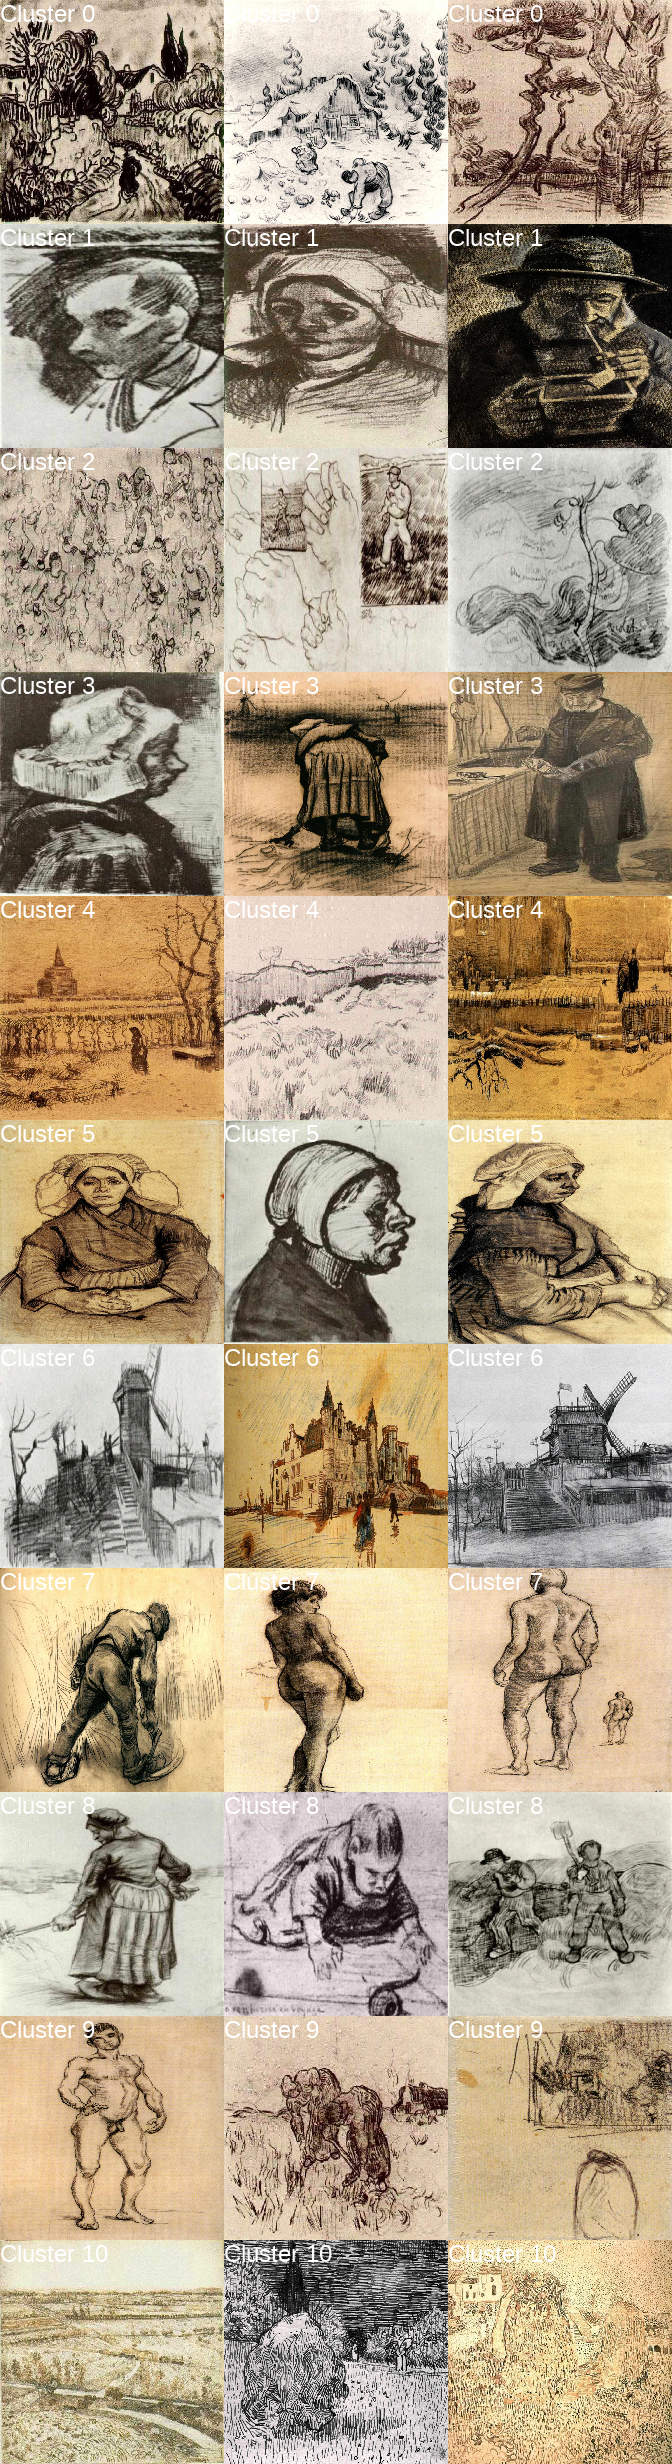

<Figure size 720x720 with 0 Axes>

In [ ]:
cols = 3
indexes = np.array([]).astype(int)
for i in range(k):
    #Get distances for a given cluster (for all images)
    cluster_dist = x_dist[:,i]
    #Sort ascending (shortest distance first) and take nearest 3
    cluster_indexes = cluster_dist.argsort(axis = 0)[:cols]
    indexes = np.concatenate((indexes,cluster_indexes))
    
to_show = dataset[indexes]
to_show = [array_to_img(i) for i in to_show]
plt.figure(figsize=(10,10))

image_grid(to_show, k, cols, True)

In [ ]:
#What cluster do you want to look at?
cluster = 8
#How many images do you want to see?
num_to_show = 12

Images Nearest the Centre of Cluster 8


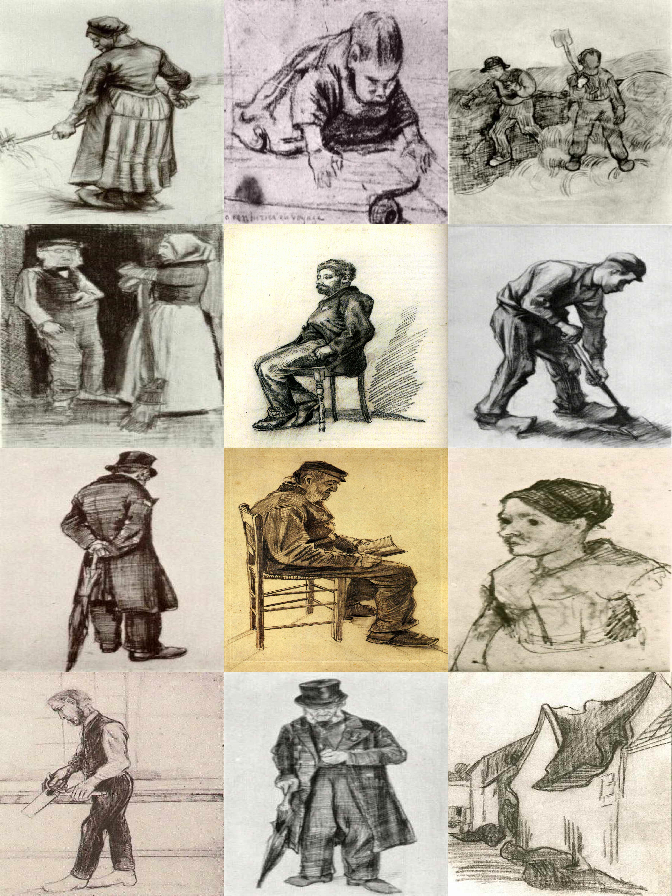

<Figure size 720x720 with 0 Axes>

In [ ]:
cluster_dist = x_dist[:,cluster]
#Sort ascending (shortest distance first)
representative_indexes = cluster_dist.argsort(axis = 0)
representative_ims = dataset[representative_indexes]
to_show = representative_ims[:num_to_show]
to_show = [array_to_img(i) for i in to_show]
plt.figure(figsize=(10,10))

#How to display images (rows x cols should equal num_images!)
print("Images Nearest the Centre of Cluster " + str(cluster)) 
image_grid(to_show, 4, 3)